In [1]:
# Download the dependencies

!wget -qq https://www.dropbox.com/s/vj61417lofjebju/utils.zip


!unzip -qq utils.zip
!rm utils.zip
!rm -r __MACOSX

!ls

 gdrive.py	    MNIST_MLP_advance.ipynb   sutils.py
'MNIST CNN.ipynb'   MNIST_MLP.ipynb


In [16]:
%matplotlib inline
from sutils import *
import os, json
from glob import glob

import tensorflow as tf
import tensorflow.python.keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten,Input
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K

In [17]:
#print(keras.__version__)
print(tf.__version__)

1.4.1


In [3]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [7]:
input_shape

(28, 28, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [18]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [19]:
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Dropout(0.25,name = 'Dropout_01')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(128, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

In [22]:
model = Model(Inp,output)

### Calculating the number of parameters for Convolution Networks
Formula is (filters x (kernel_height x kernel_width) x inputs) 1 x filters = parameters

Conv_01 = 32 Filters , 3x3 Kernel = (32 x (3x3) x 1 input) + 1bias x filters = 320 parameters
Conv_02 = 64 Filters , 3x3 Kernel = (64 x (3x3) x 32 inputs) + 1bias x filters = 18496 parameters

Dense_1 = (9216 inputs 128 units)+ 128 bias = 1,179,776
Dense_2 = (128 inputs 10 units) +10 bias = 1290

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Flatten_01 (Flatten)         (None, 9216)              0         
_________________________________________________________________
Dense_01 (Dense)             (None, 128)               1179776   
__________

In [24]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [25]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 83s - loss: 0.3368 - acc: 0.8995 - val_loss: 0.0778 - val_acc: 0.9756
Epoch 2/10
60000/60000 [==============================] - 83s - loss: 0.1105 - acc: 0.9674 - val_loss: 0.0500 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 83s - loss: 0.0846 - acc: 0.9751 - val_loss: 0.0487 - val_acc: 0.9839
Epoch 4/10
60000/60000 [==============================] - 83s - loss: 0.0698 - acc: 0.9786 - val_loss: 0.0393 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 85s - loss: 0.0627 - acc: 0.9813 - val_loss: 0.0378 - val_acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 84s - loss: 0.0571 - acc: 0.9830 - val_loss: 0.0333 - val_acc: 0.9891
Epoch 7/10
60000/60000 [==============================] - 83s - loss: 0.0503 - acc: 0.9848 - val_loss: 0.0307 - val_acc: 0.9894
Epoch 8/10
60000/60000 [==============================

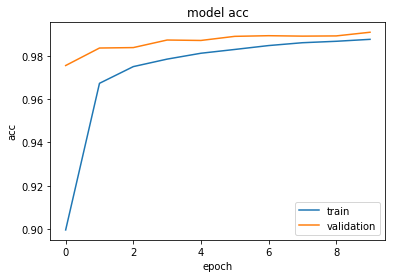

In [26]:
plot_train(hist)

In [27]:
model.save_weights('basic_cnn.h5')

In [28]:
model.save('mnist_cnn_model.h5')